In [1]:
from Clases.Codigo import *

In [2]:
Ao = 2.44
mh=hexa6(Ao)

In [16]:
def buscaMN(vectU,vectV, th, rang=15, eps=0.01, show=True):
    epsm = eps
    f1, f2 = 0, 0
    res = []
    rmin = [0,0,0,0,0.0,0.0,(0.0,0.0)]
    rmin2 = [0,0,0,0,0.0,0.0,(0.0,0.0)]
    ang = math.radians(th)
    cos = math.cos(ang)
    sen = math.sin(ang)
    ru, rv = rota(vectU,th), rota(vectV,th)
    (u1,u2) = vectU
    (v1,v2) = vectV
    ax1 = (u2*v1)-(u1*v2)
    ax2 = (u1*v1)+(u2*v2)
    ax3 = (v1**2)+(v2**2)
    ax4 = (u1**2)+(u2**2)
    delta=0.0
    print("Busqueda en a pos")
    for a in range(rang):
        for i in range(rang):
            b=-i
            if (a!=0)and(b!=0):
                c = (a*(ax1*cos-ax2*sen)/ax1)-(b*(ax3*sen)/ax1)
                d = (b*(ax1*cos+ax2*sen)/ax1)+(a*(ax4*sen)/ax1)
                r1 = sumaV(multV(a,vectU),multV(b,vectV))
                r2 = sumaV(multV(round(c),ru),multV(round(d),rv))
                err = dist(r1,r2)
                delta=dist((0,0),r1)/dist((0,0),r2)
                if err<eps:
                    if (round(c)!=0)and(round(d)!=0):
                        (f1,f2) = (c/round(c)),(d/round(d))
                    res.append([a,b,round(c),round(d),th,err,(f1,f2)])
                    if err<epsm:
                        print("nuevo mejor=",(a,b),(c,d),"Delta=",delta)
                        epsm = err
                        rmin = [a,b,round(c),round(d),th,err,(f1,f2)]
                    if show:
                        print("(n,m)=",(a,b)," (c,d)=",(round(c),round(d)),"Theta=",th,"err:",err,"Delta:{}%".format((delta-1)*100))
    return res, rmin

In [19]:
u,v=mh.u, mh.v
r,rm=buscaMN(u,v, 29.5, rang=15,eps=0.3)
rm

Busqueda en a pos
nuevo mejor= (1, -3) (-1.1197504289274547, -4.0325714627249525) Delta= 1.0000000000000002
(n,m)= (1, -3)  (c,d)= (-1, -4) Theta= 29.5 err: 0.26166788868729124 Delta:2.220446049250313e-14%
(n,m)= (1, -10)  (c,d)= (-5, -12) Theta= 29.5 err: 0.2644180285247828 Delta:0.9132609647122258%
nuevo mejor= (4, -4) (0.06981228398699146, -6.893033283532206) Delta= 0.9897433186107869
(n,m)= (4, -4)  (c,d)= (0, -7) Theta= 29.5 err: 0.229516244877248 Delta:-1.0256681389213096%
nuevo mejor= (4, -11) (-3.9103999657477178, -14.975629279978858) Delta= 1.0000000000000002
(n,m)= (4, -11)  (c,d)= (-4, -15) Theta= 29.5 err: 0.19578595249381062 Delta:2.220446049250313e-14%
(n,m)= (5, -7)  (c,d)= (-1, -11) Theta= 29.5 err: 0.2644180285247808 Delta:-0.9049959896069271%
nuevo mejor= (5, -14) (-5.030150394675172, -19.008200742703806) Delta= 1.0000000000000002
(n,m)= (5, -14)  (c,d)= (-5, -19) Theta= 29.5 err: 0.06588193619348189 Delta:2.220446049250313e-14%
nuevo mejor= (8, -3) (2.982633317784489

[8,
 -3,
 3,
 -8,
 29.5,
 0.038036953596039605,
 (0.9942111059281631, 1.0015979640574577)]

In [5]:
delta= 0.9897433186107871
mhop=hexa6(2.44*delta)
mr=mhop.mRot(30)
ur,vr=mr.u,mr.v
su1,sv1 = m2V(u,v,(4,-4)),m2V(u,v,(4,8))
su2,sv2 = m2V(ur,vr,(0,-7)),m2V(ur,vr,(7,7))
print(su1,":",su2)
print(sv1,":",sv2)

(14.64, -8.452407940936121) : (14.639999999999999, -8.452407940936121)
(0.0, 16.904815881872242) : (1.7763568394002505e-15, 16.90481588187224)


In [6]:
print(dist(su1,su2),dist(sv1,sv2))

1.7763568394002505e-15 3.972054645195637e-15


In [7]:
mr.exporta(name="Rotadaycomprimida")

1

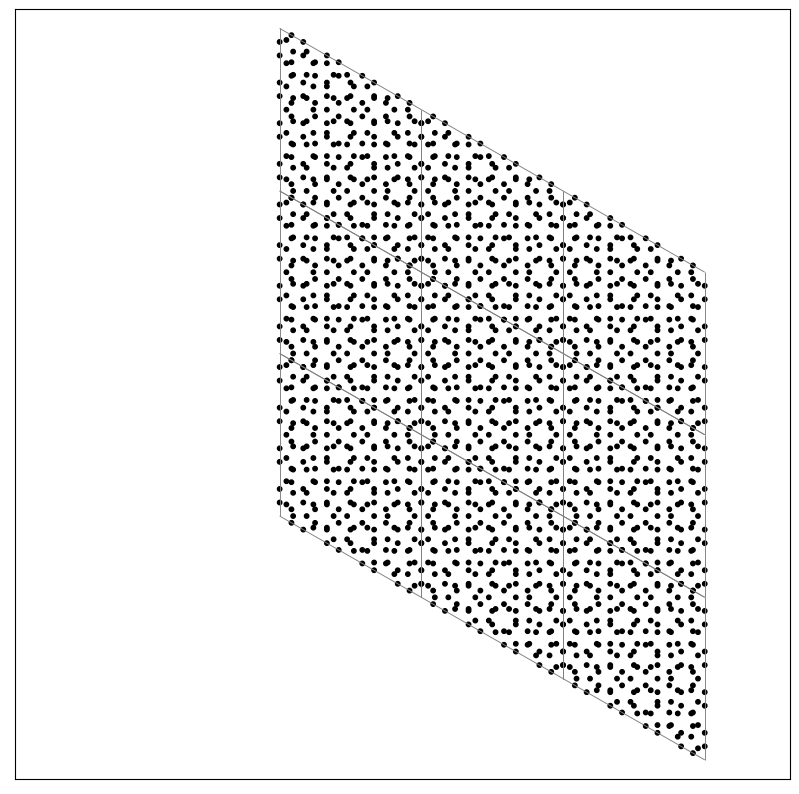

1

In [11]:
sCell1=superMesh(su1,sv1,[mh,mr])
sCell1.showNM(3,3)
sCell1.exporta(name="A 30° comprimida")

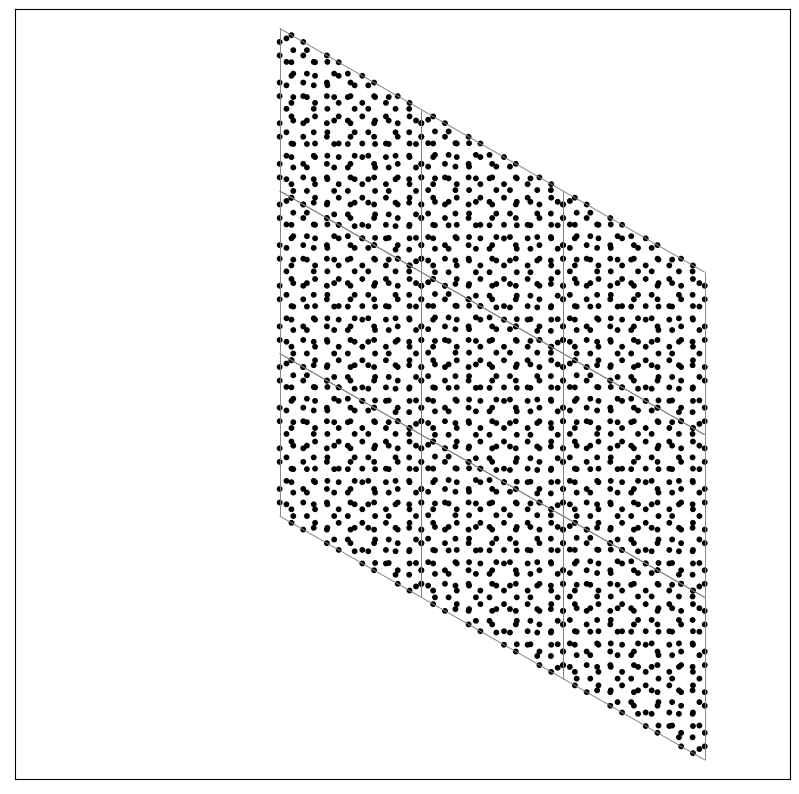

1

In [12]:
mr2=mh.mRot(30)
sCell2=superMesh(su1,sv1,[mh,mr2])
sCell2.showNM(3,3)
sCell2.exporta(name="A 30° original")